## IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import mean_squared_error
import ast
import datetime 

## LOADING THE DATASET

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape,test.shape

((2400, 23), (600, 22))

In [3]:
train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,272,NaN,72500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.sonypictures.com/homevideo/talladeg...,tt0415306,en,Talladega Nights: The Ballad of Ricky Bobby,Lifelong friends and national idols Ricky Bobb...,6.936688,...,8/4/06,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The story of a man who could only count to #1,Talladega Nights: The Ballad of Ricky Bobby,"[{'id': 5922, 'name': 'north carolina'}, {'id'...","[{'cast_id': 8, 'character': 'Ricky Bobby', 'c...","[{'credit_id': '52fe4521c3a36847f80be20f', 'de...",162966177


drop unnessary features

In [4]:
cols=['id','imdb_id','homepage','tagline','title','poster_path','original_title','overview']
train = train.drop(cols,axis = 1)
test = test.drop(cols,axis = 1)

In [5]:
train.head(5)

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew,revenue
0,NaN,72500000,"[{'id': 35, 'name': 'Comedy'}]",en,6.936688,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/4/06,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 5922, 'name': 'north carolina'}, {'id'...","[{'cast_id': 8, 'character': 'Ricky Bobby', 'c...","[{'credit_id': '52fe4521c3a36847f80be20f', 'de...",162966177
1,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 28, '...",en,3.148745,"[{'name': 'Cheyenne Enterprises', 'id': 890}, ...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",7/26/02,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 3185, 'name': 'crocodile'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47019251416c7508ad2d', 'de...",33082548
2,"[{'id': 10456, 'name': 'Dirty Harry Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,10.226181,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",12/23/73,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"[{'id': 1679, 'name': 'arbitrary law'}, {'id':...","[{'cast_id': 1, 'character': 'Insp. Harry Cala...","[{'credit_id': '52fe439b9251416c7501701b', 'de...",39768000
3,NaN,24554,"[{'id': 18, 'name': 'Drama'}]",en,0.154526,NaN,NaN,9/12/98,95.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,"[{'cast_id': 2, 'character': 'Malli', 'credit_...","[{'credit_id': '52fe475bc3a36847f813138f', 'de...",140021
4,NaN,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",en,6.316596,"[{'name': 'A24', 'id': 41077}, {'name': 'On Th...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",10/2/16,117.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 8516, 'name': 'oasis'}, {'id': 18035, ...","[{'cast_id': 0, 'character': 'Himself', 'credi...","[{'credit_id': '57d1cbecc3a3684e1f001230', 'de...",226286


In [6]:
train.shape,test.shape

((2400, 15), (600, 14))

## Data analysis

In [7]:
print('There exist(s) {} duplicate row(s).'.format(sum(train.duplicated())))

There exist(s) 0 duplicate row(s).


In [8]:
train.describe()

,budget,popularity,runtime,revenue
count,2.400000e+03,2400.000000,2398.000000,2.400000e+03
mean,2.240144e+07,8.402912,107.718932,6.765008e+07
std,3.700495e+07,10.957192,22.489218,1.361038e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.071329,94.000000,2.402361e+06
50%,8.000000e+06,7.411002,104.000000,1.704623e+07
75%,2.800000e+07,10.937387,118.000000,7.173634e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


In [9]:
train.isna().sum()

belongs_to_collection    1917
budget                      0
genres                      6
original_language           0
popularity                  0
production_companies      122
production_countries       43
release_date                0
runtime                     2
spoken_languages           17
status                      0
Keywords                  218
cast                       11
crew                       13
revenue                     0
dtype: int64

In [10]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

## Data preprocessing

### Released

In [11]:
train['status'].unique()

array(['Released', 'Rumored'], dtype=object)

change release equal 1 and rumored equal 0 

In [12]:
train['released']= train['status'].apply(lambda x: 1 if x == 'Released' else 0)
test['released']= test['status'].apply(lambda x: 1 if x == 'Released' else 0)

In [13]:
train = train.drop(['status'], axis=1)
test = test.drop(['status'], axis=1)

### release_date

In [14]:
train['release_date'] =  pd.to_datetime(train['release_date'])
test['release_date'] =  pd.to_datetime(test['release_date'])

In [15]:
train['release_date'] = train['release_date'] .map(pd.datetime.toordinal)
test['release_date'] = test['release_date'] .map(pd.datetime.toordinal)

C:\Users\Samir\AppData\Local\Temp/ipykernel_6384/976589821.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  train['release_date'] = train['release_date'] .map(pd.datetime.toordinal)
C:\Users\Samir\AppData\Local\Temp/ipykernel_6384/976589821.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  test['release_date'] = test['release_date'] .map(pd.datetime.toordinal)


as most of movies don't belong to collection so what is metter is if movie belong to collection or not then change column to binary

In [16]:
train.head(5)

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,Keywords,cast,crew,revenue,released
0,{},72500000,"[{'id': 35, 'name': 'Comedy'}]",en,6.936688,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",732527,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 5922, 'name': 'north carolina'}, {'id'...","[{'cast_id': 8, 'character': 'Ricky Bobby', 'c...","[{'credit_id': '52fe4521c3a36847f80be20f', 'de...",162966177,1
1,{},0,"[{'id': 10751, 'name': 'Family'}, {'id': 28, '...",en,3.148745,"[{'name': 'Cheyenne Enterprises', 'id': 890}, ...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",731057,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 3185, 'name': 'crocodile'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47019251416c7508ad2d', 'de...",33082548,1
2,"[{'id': 10456, 'name': 'Dirty Harry Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,10.226181,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",720615,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 1679, 'name': 'arbitrary law'}, {'id':...","[{'cast_id': 1, 'character': 'Insp. Harry Cala...","[{'credit_id': '52fe439b9251416c7501701b', 'de...",39768000,1
3,{},24554,"[{'id': 18, 'name': 'Drama'}]",en,0.154526,{},{},729644,95.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",{},"[{'cast_id': 2, 'character': 'Malli', 'credit_...","[{'credit_id': '52fe475bc3a36847f813138f', 'de...",140021,1
4,{},0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",en,6.316596,"[{'name': 'A24', 'id': 41077}, {'name': 'On Th...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",736239,117.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 8516, 'name': 'oasis'}, {'id': 18035, ...","[{'cast_id': 0, 'character': 'Himself', 'credi...","[{'credit_id': '57d1cbecc3a3684e1f001230', 'de...",226286,1


### belongs_to_collection

In [17]:
train['belongs_to_collection'] = train['belongs_to_collection'].apply(lambda x:1 if x !={} else 0 )
test['belongs_to_collection'] = test['belongs_to_collection'].apply(lambda x:1 if x !={} else 0 )

### Genre

In [18]:
genre_list = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []))

In [19]:
Counter([i for j in genre_list for i in j])

Counter({'Comedy': 836,
         'Family': 215,
         'Action': 588,
         'Adventure': 351,
         'Crime': 375,
         'Thriller': 636,
         'Drama': 1224,
         'Documentary': 73,
         'Music': 83,
         'History': 106,
         'Horror': 236,
         'Fantasy': 190,
         'Science Fiction': 218,
         'Foreign': 26,
         'Animation': 105,
         'Mystery': 179,
         'Romance': 458,
         'War': 87,
         'Western': 37,
         'TV Movie': 1})

drop any genre has less han 50 movie

In [20]:
top_genres = [m[0] for m in Counter([i for j in genre_list for i in j]).most_common(17)]

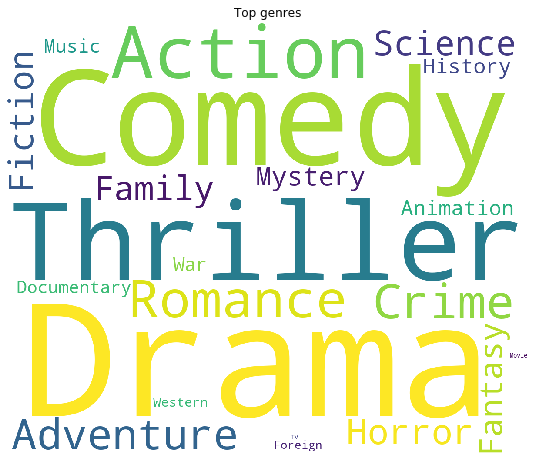

In [21]:
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in genre_list for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

In [22]:
for g in top_genres:
    train['genre_' + g] = train['genres'].apply(lambda x: 1 if g in [i['name'] for i in x] else 0)
    
for g in top_genres:
    test['genre_' + g] = test['genres'].apply(lambda x: 1 if g in [i['name'] for i in x] else 0)

train = train.drop(['genres'], axis=1)
test = test.drop(['genres'], axis=1)

### production_countries

In [23]:
production_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []))

In [24]:
Counter([i for j in production_countries for i in j])

Counter({'United States of America': 1830,
         'Australia': 45,
         'United Kingdom': 298,
         'South Korea': 19,
         'India': 63,
         'France': 182,
         'Japan': 48,
         'Canada': 100,
         'Italy': 49,
         'Spain': 43,
         'Germany': 124,
         'China': 32,
         'Switzerland': 7,
         'Israel': 3,
         'Czech Republic': 13,
         'Romania': 5,
         'Denmark': 11,
         'Sweden': 14,
         'Ireland': 17,
         'Turkey': 2,
         'Russia': 43,
         'New Zealand': 9,
         'Mongolia': 1,
         'Netherlands': 14,
         'Hong Kong': 31,
         'Malta': 2,
         'Morocco': 3,
         'Luxembourg': 6,
         'Mexico': 16,
         'South Africa': 7,
         'Brazil': 10,
         'Ukraine': 1,
         'Greece': 6,
         'Belgium': 20,
         'Iran': 4,
         'Chile': 4,
         'Philippines': 3,
         'Croatia': 1,
         'Ethiopia': 1,
         'Bulgaria': 3,
         'Ca

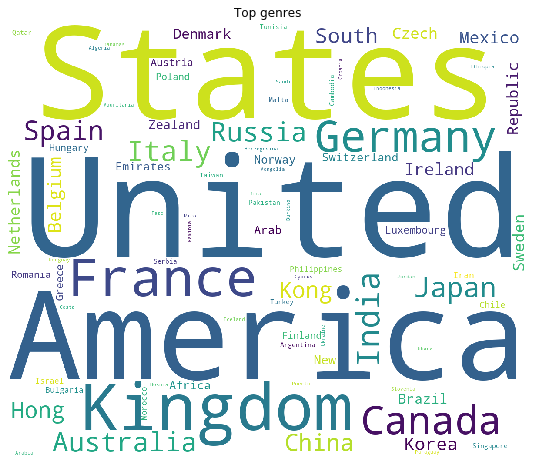

In [25]:
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in production_countries for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

choose only top 5 countries

In [26]:
production_countries = [m[0] for m in Counter([i for j in production_countries for i in j]).most_common(5)]
production_countries

['United States of America', 'United Kingdom', 'France', 'Germany', 'Canada']

In [27]:
for g in production_countries:
    train['production_country_' + g] = train['production_countries'].apply(lambda x: 1 if g in [i['name'] for i in x] else 0)
    
for g in production_countries:
    test['production_country_' + g] = test['production_countries'].apply(lambda x: 1 if g in [i['name'] for i in x] else 0)

train = train.drop(['production_countries'], axis=1)
test = test.drop(['production_countries'], axis=1)

### original_language

In [28]:
original_language = list(train['original_language'].apply(lambda x: x if x != {} else []))

In [29]:
Counter(original_language)

Counter({'en': 2063,
         'ko': 18,
         'ta': 12,
         'ja': 29,
         'fr': 66,
         'te': 2,
         'it': 19,
         'he': 1,
         'es': 33,
         'sv': 7,
         'hi': 34,
         'ru': 34,
         'pt': 5,
         'cn': 15,
         'ro': 3,
         'fa': 4,
         'de': 15,
         'zh': 16,
         'da': 4,
         'fi': 1,
         'hu': 2,
         'nl': 5,
         'no': 2,
         'ar': 1,
         'el': 1,
         'sr': 1,
         'pl': 2,
         'mr': 1,
         'tr': 1,
         'ur': 1,
         'nb': 1,
         'ml': 1})

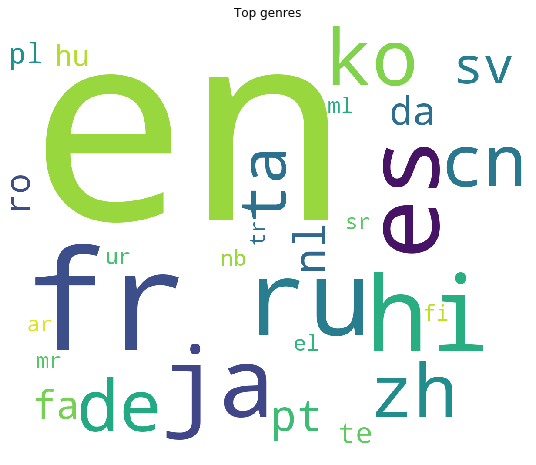

In [30]:
plt.figure(figsize = (12, 8))
text = ' '.join( original_language)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

choose only top 5 countries

In [31]:
original_language = [m[0] for m in Counter(original_language).most_common(2)]
original_language

['en', 'fr']

In [32]:
for g in original_language:
    train['original_language' + g] = train['original_language'].apply(lambda x: 1 if g == x else 0)
    
for g in original_language:
    test['original_language' + g] = test['original_language'].apply(lambda x: 1 if g == x else 0)

train = train.drop(['original_language'], axis=1)
test = test.drop(['original_language'], axis=1)

### Correlation Analysis:

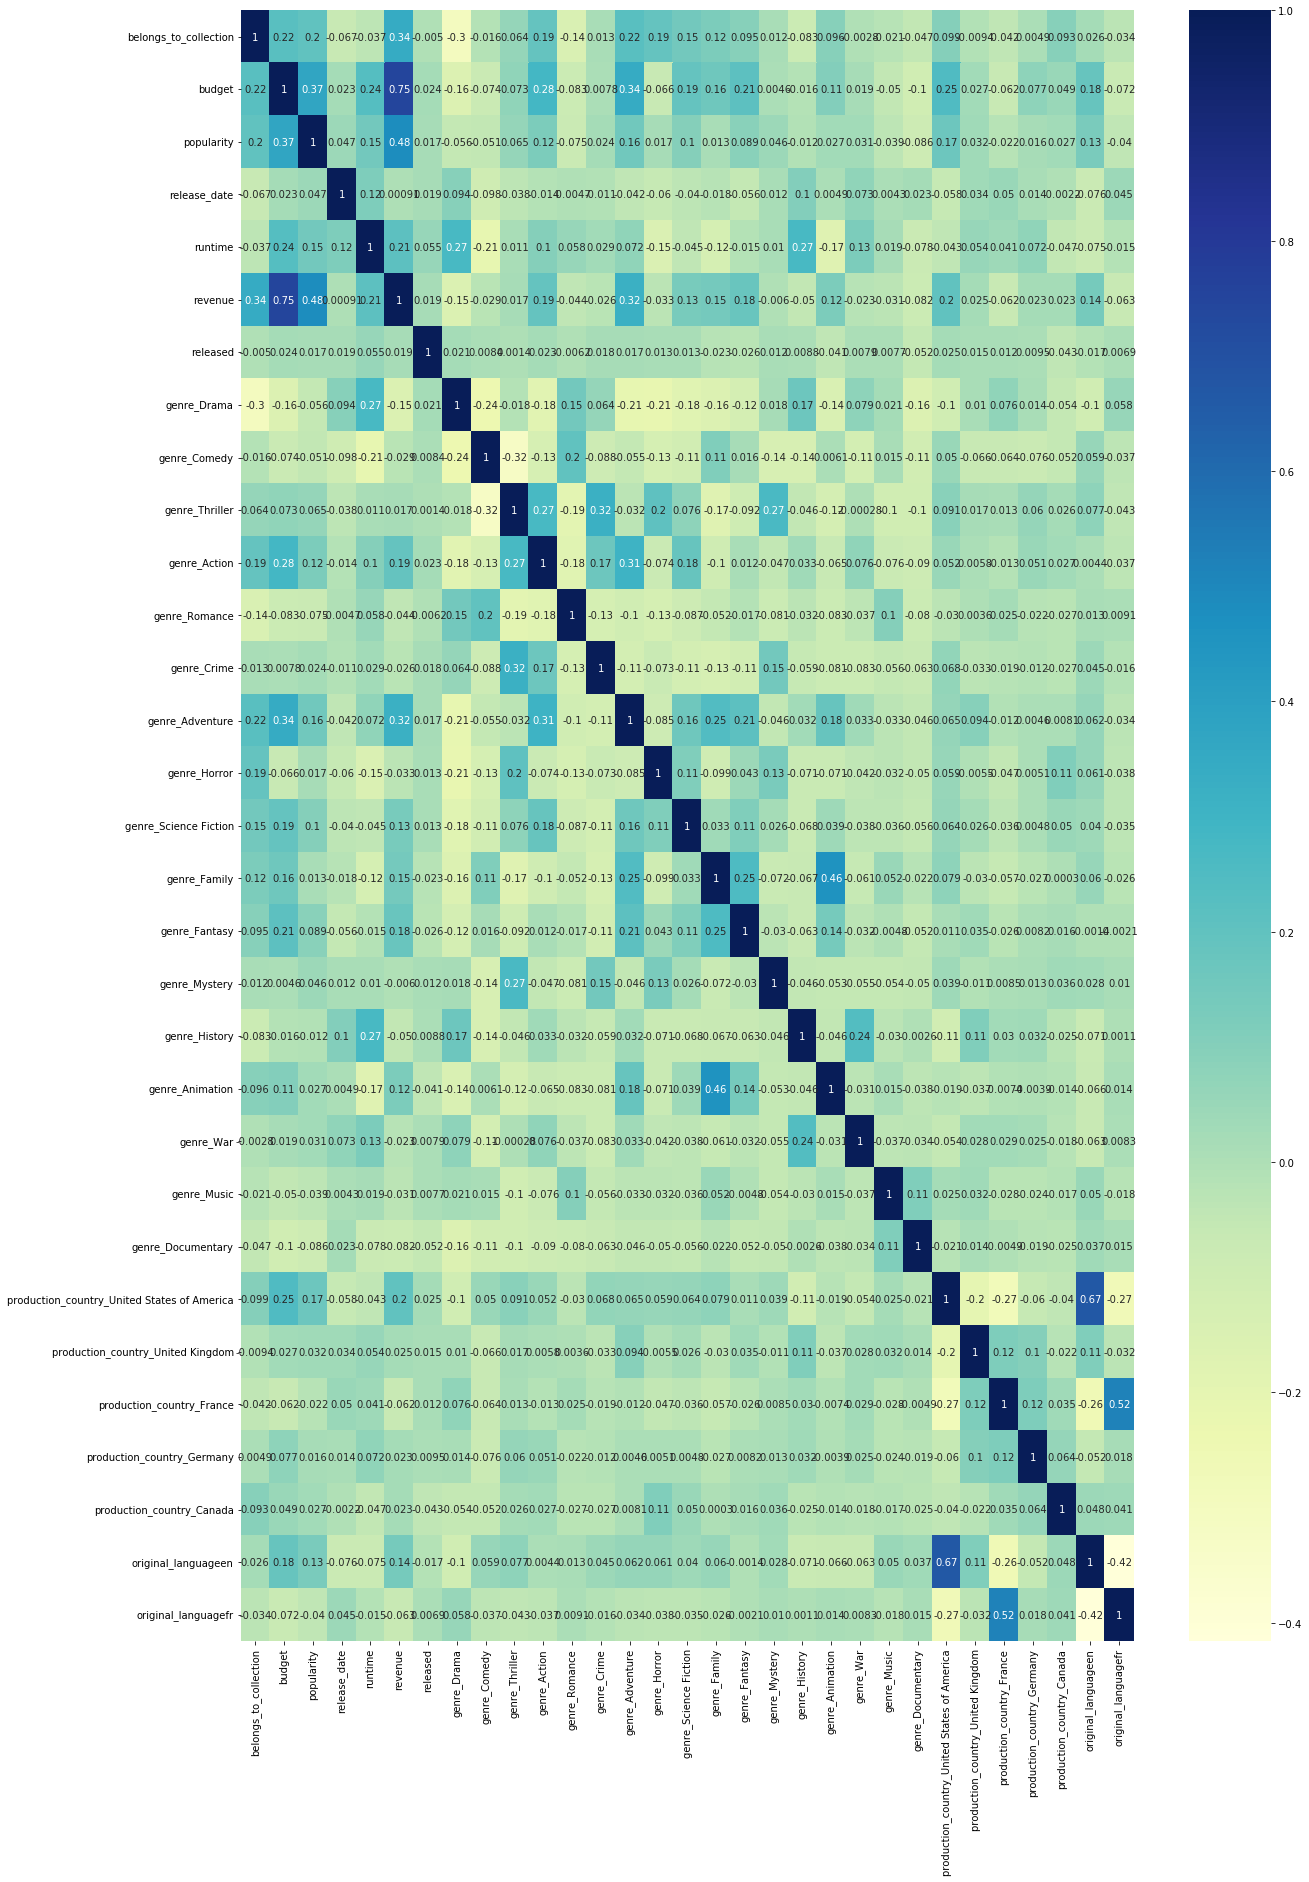

In [33]:
fig, ax = plt.subplots(figsize=(20,30))
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True, ax=ax)
  
plt.show()

In [34]:
y=train['revenue']
cols=['production_companies','revenue','spoken_languages','Keywords','cast','crew']
X=train.drop(cols,axis = 1)

In [35]:
X.fillna(X.median(), inplace = True)


## linear Regression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15,random_state=10,shuffle=True)
reg = LinearRegression().fit(X_train, y_train)

In [37]:
reg.coef_

array([ 6.05955371e+07,  2.28154466e+00,  2.53864114e+06, -2.65242802e+02,
        3.70259064e+05,  3.73557102e+07, -1.50463920e+06,  2.72222070e+06,
       -2.69751619e+06, -1.61182161e+07,  1.13068543e+07, -1.24203314e+07,
        1.55877487e+07, -6.56143161e+06, -1.56347228e+07, -7.76150547e+06,
        3.84113436e+06, -3.38046823e+06, -2.08181743e+07,  1.78157495e+07,
       -2.95108616e+07, -1.40054228e+06,  2.60522803e+06, -5.45528109e+06,
       -3.82134413e+06, -7.43708014e+06, -1.14816214e+07, -1.53826491e+07,
        2.69252614e+06,  2.13987952e+06])

In [38]:
y_predict=reg.predict(X_test)

In [40]:
mse= mean_squared_error(y_test, y_predict, squared=False)
mse

73236281.68431354

In [41]:
cols=['production_companies','spoken_languages','Keywords','cast','crew']
X_test=test.drop(cols,axis = 1)

In [42]:
y_predict=reg.predict(X_test)